In [1]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(5)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from numpy import array

In [2]:
data = pd.read_csv("../data/RICB.csv")
data

,DateTime,RICB
0,2020-04-23 06:34:02,70
1,2020-04-23 09:34:02,70
2,2020-04-24 06:34:01,70
3,2020-04-24 09:34:02,70
4,2020-04-27 06:33:57,70
...,...,...
2497,2022-07-14 04:55:53,70
2498,2022-07-14 05:55:54,70
2499,2022-07-14 07:55:52,70
2500,2022-07-14 08:55:53,70


In [3]:
#Changing datetime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date

#renaming the columns
data.rename(columns = {'DateTime':'date','RICB':'price'}, inplace = True)
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")
data

,date,price
0,2020-04-23,70
1,2020-04-23,70
2,2020-04-24,70
3,2020-04-24,70
4,2020-04-27,70
...,...,...
2497,2022-07-14,70
2498,2022-07-14,70
2499,2022-07-14,70
2500,2022-07-14,70


In [4]:
data = data.groupby('date').mean()
data

,price
date,
2020-04-23,70.0
2020-04-24,70.0
2020-04-27,70.0
2020-04-28,70.0
2020-04-29,70.0
...,...
2022-07-11,70.0
2022-07-12,70.0
2022-07-13,70.0


In [5]:
data1=data.reset_index()['price']
data1

0      70.0
1      70.0
2      70.0
3      70.0
4      70.0
       ... 
543    70.0
544    70.0
545    70.0
546    70.0
547    70.0
Name: price, Length: 548, dtype: float64

In [6]:
print("Size of the dataset: ",data1.shape)
print("Checking for null values:\n",data1.isnull().sum())
print("Checking Data-type of each column:\n",data1.dtypes)

Size of the dataset:  (548,)
Checking for null values:
 0
Checking Data-type of each column:
 float64


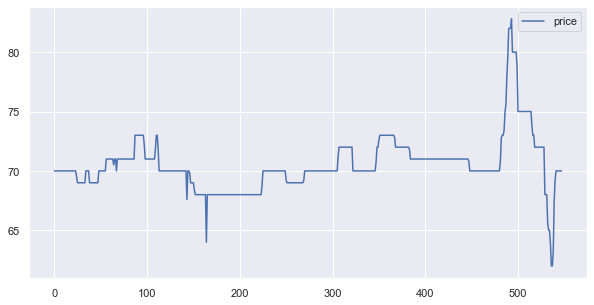

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data1,label='price')
plt.legend()
plt.show()

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [9]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [10]:
len(train_data)

356

In [11]:
training_size,test_size

(356, 192)

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
import numpy
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(345, 10)
(345,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(181, 10)
(181,)


(None, None)

In [16]:
X_train.shape[1]

10

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
model=Sequential()
model.add(GRU(64,activation='relu', return_sequences=False,input_shape=(time_step,1)))
#model.add(GRU(128,activation='relu'))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#model.summary()

In [19]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,verbose=2)

Epoch 1/200
11/11 - 1s - loss: 0.0593 - val_loss: 0.0167 - 1s/epoch - 121ms/step
Epoch 2/200
11/11 - 0s - loss: 0.0096 - val_loss: 0.0158 - 93ms/epoch - 8ms/step
Epoch 3/200
11/11 - 0s - loss: 0.0042 - val_loss: 0.0099 - 95ms/epoch - 9ms/step
Epoch 4/200
11/11 - 0s - loss: 0.0017 - val_loss: 0.0065 - 90ms/epoch - 8ms/step
Epoch 5/200
11/11 - 0s - loss: 0.0014 - val_loss: 0.0092 - 80ms/epoch - 7ms/step
Epoch 6/200
11/11 - 0s - loss: 0.0013 - val_loss: 0.0067 - 77ms/epoch - 7ms/step
Epoch 7/200
11/11 - 0s - loss: 0.0011 - val_loss: 0.0065 - 81ms/epoch - 7ms/step
Epoch 8/200
11/11 - 0s - loss: 9.6967e-04 - val_loss: 0.0055 - 80ms/epoch - 7ms/step
Epoch 9/200
11/11 - 0s - loss: 8.8142e-04 - val_loss: 0.0044 - 80ms/epoch - 7ms/step
Epoch 10/200
11/11 - 0s - loss: 7.2876e-04 - val_loss: 0.0039 - 80ms/epoch - 7ms/step
Epoch 11/200
11/11 - 0s - loss: 6.6745e-04 - val_loss: 0.0035 - 80ms/epoch - 7ms/step
Epoch 12/200
11/11 - 0s - loss: 5.8739e-04 - val_loss: 0.0033 - 79ms/epoch - 7ms/step
Epoch

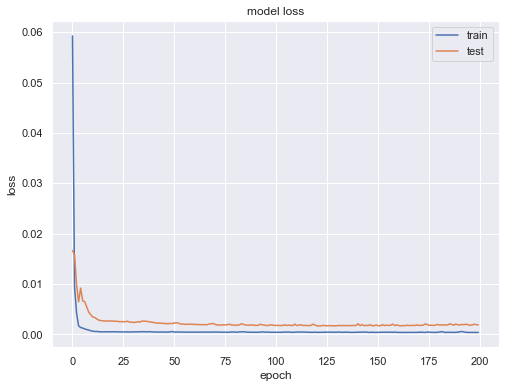

In [20]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [22]:
rstrain_predict=scaler.inverse_transform(train_predict)
rstest_predict=scaler.inverse_transform(test_predict)
rsytest=scaler.inverse_transform(np.array(ytest).reshape(-1,1))
rsytrain=scaler.inverse_transform(np.array(y_train).reshape(-1,1))

In [23]:
RMSE_train=math.sqrt(mean_squared_error(rsytrain,rstrain_predict))
print(RMSE_train)

0.4090952732282828


In [24]:
RMSE_test=math.sqrt(mean_squared_error(rsytest,rstest_predict))
MAE_test=mean_absolute_error(rsytest,rstest_predict)
R2_test=r2_score(rsytest,rstest_predict)
print("RMSE:", RMSE_test)
print("MAE:", MAE_test)
print("R-Squared:", R2_test)

RMSE: 0.9059522215365919
MAE: 0.4270970550031294
R-Squared: 0.9178879625693611


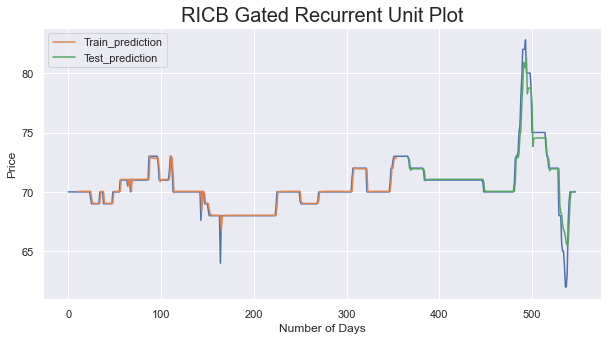

In [25]:
look_back=10
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = rstrain_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = rstest_predict
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.title('RICB Gated Recurrent Unit Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [26]:
len(test_data)

192

In [27]:
x_input=test_data[182:].reshape(1,-1)
x_input.shape

(1, 10)

In [28]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.05769230769230793,
 0.259615384615385,
 0.34615384615384626,
 0.3846153846153846,
 0.3846153846153846,
 0.3846153846153846,
 0.3846153846153846,
 0.3846153846153846,
 0.3846153846153846,
 0.3846153846153846]

In [29]:
lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

In [30]:
forecast_rescaled=scaler.inverse_transform(lst_output)

In [31]:
forecast_rescaled

array([[70.04484534],
       [70.09113612],
       [70.13742814],
       [70.18396254],
       [70.23098602],
       [70.27865543],
       [70.32704268],
       [70.37617378],
       [70.42606797],
       [70.47673764],
       [70.52819395],
       [70.58044186],
       [70.63349066],
       [70.68734779],
       [70.74201946],
       [70.79751124],
       [70.8538312 ],
       [70.91098614],
       [70.96898103],
       [71.02782454],
       [71.08751979],
       [71.1468214 ],
       [71.20244088],
       [71.25186768],
       [71.29458852],
       [71.33102679],
       [71.36194434],
       [71.3881495 ],
       [71.41032724],
       [71.42907701]])

In [32]:
day_new=np.arange(0,547)
day_pred=np.arange(547,577)

In [33]:
forecast = pd.DataFrame(forecast_rescaled, columns = ['predicted_price'])
forecast.head()

,predicted_price
0,70.044845
1,70.091136
2,70.137428
3,70.183963
4,70.230986


In [34]:
data

,price
date,
2020-04-23,70.0
2020-04-24,70.0
2020-04-27,70.0
2020-04-28,70.0
2020-04-29,70.0
...,...
2022-07-11,70.0
2022-07-12,70.0
2022-07-13,70.0


In [35]:
forecast['date'] = pd.date_range(start='2022-07-15', periods=30, freq='D')
forecast.head()

,predicted_price,date
0,70.044845,2022-07-15
1,70.091136,2022-07-16
2,70.137428,2022-07-17
3,70.183963,2022-07-18
4,70.230986,2022-07-19


In [36]:
forecast = forecast.set_index('date')
forecast

,predicted_price
date,
2022-07-15,70.044845
2022-07-16,70.091136
2022-07-17,70.137428
2022-07-18,70.183963
2022-07-19,70.230986
2022-07-20,70.278655
2022-07-21,70.327043
2022-07-22,70.376174
2022-07-23,70.426068


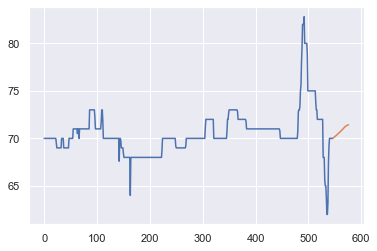

In [38]:
plt.plot(day_new,scaler.inverse_transform(data1[1:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

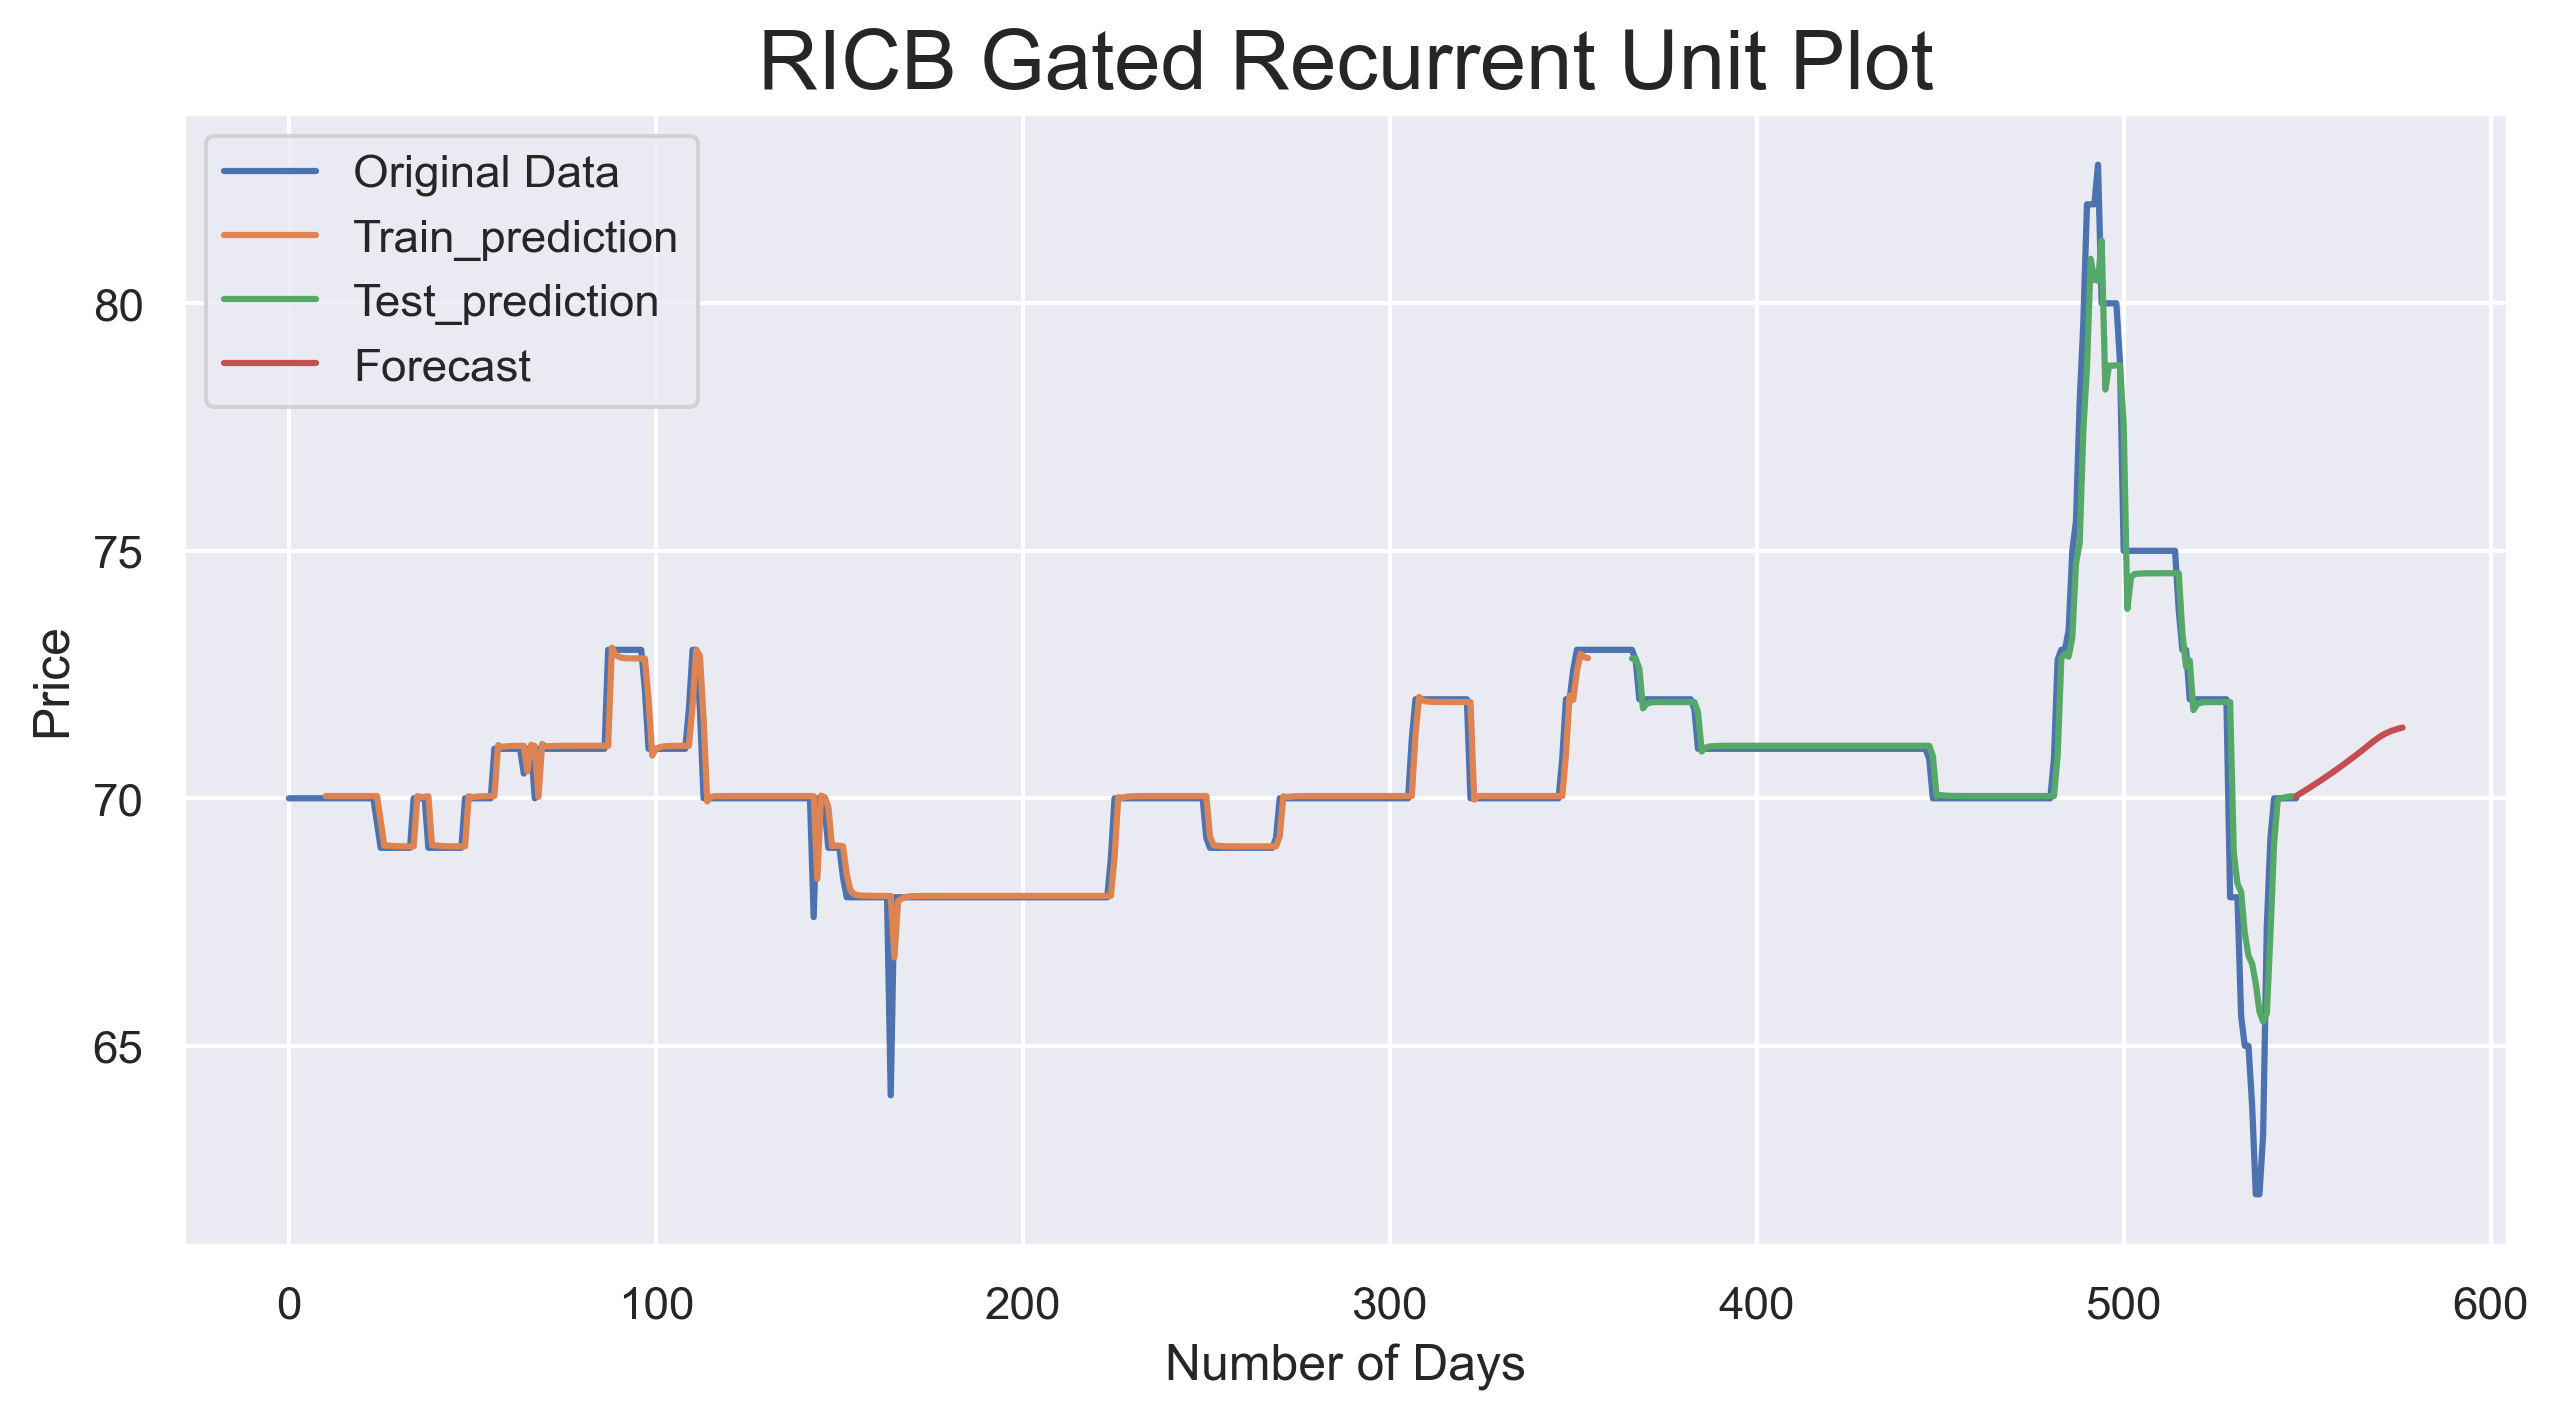

In [40]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(scaler.inverse_transform(data1), label='Original Data')
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.plot(day_pred,scaler.inverse_transform(lst_output), label='Forecast')
plt.title('RICB Gated Recurrent Unit Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [41]:
forecast = forecast.to_csv('predictedData/ricb_gru_forecast.csv')

In [42]:
len(day_pred)

30

In [43]:
len(forecast_rescaled)

30

In [44]:
len(testPredictPlot)

548

In [45]:
np.count_nonzero(np.isnan(testPredictPlot))

367

In [46]:
#convert numpy array to DF
test = pd.DataFrame(testPredictPlot, columns = ['predicted_price'])
test.head

<bound method NDFrame.head of      predicted_price
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
..               ...
543        69.997215
544        70.022881
545        70.036079
546        70.041618
547              NaN

[548 rows x 1 columns]>

In [47]:
test.isnull().sum()

predicted_price    367
dtype: int64

In [48]:
test = test.dropna()
test

,predicted_price
366,72.824959
367,72.824959
368,72.618179
369,71.817673
370,71.909645
...,...
542,69.977318
543,69.997215
544,70.022881
545,70.036079


In [49]:
size = int(len(data) * 0.65)
size

356

In [50]:
#to know the date of test data
data.iloc[355+10:]  #10 for that time steps

,price
date,
2021-10-13,73.0
2021-10-14,73.0
2021-10-18,72.8
2021-10-19,72.0
2021-10-20,72.0
...,...
2022-07-11,70.0
2022-07-12,70.0
2022-07-13,70.0


In [51]:
test['date'] = pd.date_range(start='2021-10-15', periods=181, freq='D')
test

C:\Users\Asus\AppData\Local\Temp/ipykernel_2108/531574769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = pd.date_range(start='2021-10-15', periods=181, freq='D')


,predicted_price,date
366,72.824959,2021-10-15
367,72.824959,2021-10-16
368,72.618179,2021-10-17
369,71.817673,2021-10-18
370,71.909645,2021-10-19
...,...,...
542,69.977318,2022-04-09
543,69.997215,2022-04-10
544,70.022881,2022-04-11
545,70.036079,2022-04-12


In [52]:
col = ['date','predicted_price']
test = test[col]
test

,date,predicted_price
366,2021-10-15,72.824959
367,2021-10-16,72.824959
368,2021-10-17,72.618179
369,2021-10-18,71.817673
370,2021-10-19,71.909645
...,...,...
542,2022-04-09,69.977318
543,2022-04-10,69.997215
544,2022-04-11,70.022881
545,2022-04-12,70.036079


In [53]:
test = test.set_index('date')

In [54]:
test = test.to_csv('predictedData/ricb_gru_testPred.csv')